Minutely Activity Data:

Fitbit data analysis involves examining minute-by-minute activity tracked by Fitbit devices. This includes monitoring various metrics such as steps taken, distance traveled, calories burned, heart rate, and sleep patterns

Objective:

Analyzing this data can provide insights into an individuals physical activity levels, overall health, and sleep quality.

1. ImportingLibraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


2. Data Cleaning and merging of minuteActivity_merged data

In [ ]:
df_MCN = pd.read_csv("/content/minuteCaloriesNarrow_merged.csv")
df_MCW = pd.read_csv("/content/minuteCaloriesWide_merged.csv")
df_MIN = pd.read_csv("/content/minuteIntensitiesNarrow_merged.csv")
df_MIW = pd.read_csv("/content/minuteIntensitiesWide_merged.csv")
df_MET_Narrow = pd.read_csv("/content/minuteMETsNarrow_merged.csv")
df_min_sleep = pd.read_csv("/content/minuteSleep_merged.csv")
df_MSN = pd.read_csv("/content/minuteStepsNarrow_merged.csv")
df_MSW = pd.read_csv("/content/minuteStepsWide_merged.csv")

In [ ]:
from datetime import datetime
print(df_MIN.dtypes)

# Converting an Activityminute in datetime format.
df_MIN['ActivityMinute'] = pd.to_datetime(df_MIN['ActivityMinute'])

# Converting an ActivityHour in datetime format.
df_MIW['ActivityHour'] = pd.to_datetime(df_MIW['ActivityHour'],format='%m/%d/%Y %I:%M:%S %p')

Id                  int64
ActivityMinute     object
Intensity         float64
dtype: object


3. Converting ActiviMinute and ActivityHour in datetime format.

In [ ]:
print(df_MCN.dtypes)
print(df_MCW.dtypes)
print(df_MSW.dtypes)

# Converting in datetime format.
from datetime import datetime
# Convert ActivityMinute column to datetime
df_MCN['ActivityMinute'] = pd.to_datetime(df_MCN['ActivityMinute'], errors='coerce')

# Drop rows with NaT (Not a Time) values
df_MCN = df_MCN.dropna(subset=['ActivityMinute'])
# errors='coerce' will force pandas to convert problematic timestamps to NaT, and then droped nat values using dropna().

df_MIN['ActivityMinute'] = pd.to_datetime(df_MIN['ActivityMinute'], errors='coerce')
df_MIN = df_MSN.dropna(subset=['ActivityMinute'])
df_MSN['ActivityMinute'] = pd.to_datetime(df_MSN['ActivityMinute'],errors='coerce')
df_MSN = df_MSN.dropna(subset=['ActivityMinute'])
df_MCW['ActivityHour'] = pd.to_datetime(df_MCW['ActivityHour'],format='%m/%d/%Y %I:%M:%S %p')
df_MSW['ActivityHour'] = pd.to_datetime(df_MSW['ActivityHour'],format='%m/%d/%Y %I:%M:%S %p')

Id                         int64
ActivityMinute    datetime64[ns]
Calories                 float64
dtype: object
Id                       int64
ActivityHour    datetime64[ns]
Calories00             float64
Calories01             float64
Calories02             float64
                     ...      
Calories55             float64
Calories56             float64
Calories57             float64
Calories58             float64
Calories59             float64
Length: 62, dtype: object
Id                       int64
ActivityHour    datetime64[ns]
Steps00                  int64
Steps01                  int64
Steps02                  int64
                     ...      
Steps55                float64
Steps56                float64
Steps57                float64
Steps58                float64
Steps59                float64
Length: 62, dtype: object


In [ ]:
# Convert ActivityMinute column to datetime
df_MET_Narrow['ActivityMinute'] = pd.to_datetime(df_MET_Narrow['ActivityMinute'], errors='coerce')

# Drop rows with NaT (Not a Time) values
df_MET_Narrow = df_MET_Narrow.dropna(subset=['ActivityMinute'])

# Convert Id column to int
df_MET_Narrow['Id'] = df_MET_Narrow['Id'].astype(int)

In [ ]:
print(df_MIN.head())
print(df_MCN.head())
print(df_MET_Narrow.head())
print(df_MSN.head())

           Id      ActivityMinute  Intensity
0  1503960366 2016-04-12 00:00:00        0.0
1  1503960366 2016-04-12 00:01:00        0.0
2  1503960366 2016-04-12 00:02:00        0.0
3  1503960366 2016-04-12 00:03:00        0.0
4  1503960366 2016-04-12 00:04:00        0.0
           Id      ActivityMinute  Calories
0  1503960366 2016-04-12 00:00:00    0.7865
1  1503960366 2016-04-12 00:01:00    0.7865
2  1503960366 2016-04-12 00:02:00    0.7865
3  1503960366 2016-04-12 00:03:00    0.7865
4  1503960366 2016-04-12 00:04:00    0.7865
           Id         ActivityMinute  METs
0  1503960366  4/12/2016 12:00:00 AM  10.0
1  1503960366  4/12/2016 12:01:00 AM  10.0
2  1503960366  4/12/2016 12:02:00 AM  10.0
3  1503960366  4/12/2016 12:03:00 AM  10.0
4  1503960366  4/12/2016 12:04:00 AM  10.0
           Id      ActivityMinute  Steps
0  1503960366 2016-04-12 00:00:00    0.0
1  1503960366 2016-04-12 00:01:00    0.0
2  1503960366 2016-04-12 00:02:00    0.0
3  1503960366 2016-04-12 00:03:00    0.0
4  

In [ ]:
df_MSN.dtypes
#df_merged1.dtypes
df_MET_Narrow.dtypes

Id                        object
ActivityMinute    datetime64[ns]
METs                     float64
dtype: object

In [ ]:
# Merging minuteCaloriesNarrow and minuteIntensitiesNarrow dataframes.
df_merged1 = pd.merge(df_MCN,df_MIN,on=['Id','ActivityMinute'])
print(df_merged1.head())

# Merging minuteMETNarrow and minuteStepsNarrow dataframes.
df_merged2 = pd.merge(df_MET_Narrow,df_MSN,on=['Id','ActivityMinute'])
print(df_merged2.head())

# Merging df_merged1 and df_merged2 dataframes.
df_narrow_merged = pd.merge(df_merged1,df_merged2,on=['Id','ActivityMinute'])
print(df_narrow_merged.head())

# Check the datatypes of each column in df_narrow_merged.
df_narrow_merged.dtypes

           Id      ActivityMinute  Calories  Steps
0  1503960366 2016-04-12 00:00:00    0.7865    0.0
1  1503960366 2016-04-12 00:01:00    0.7865    0.0
2  1503960366 2016-04-12 00:02:00    0.7865    0.0
3  1503960366 2016-04-12 00:03:00    0.7865    0.0
4  1503960366 2016-04-12 00:04:00    0.7865    0.0
           Id      ActivityMinute  METs  Steps
0  1503960366 2016-04-12 00:00:00  10.0    0.0
1  1503960366 2016-04-12 00:01:00  10.0    0.0
2  1503960366 2016-04-12 00:02:00  10.0    0.0
3  1503960366 2016-04-12 00:03:00  10.0    0.0
4  1503960366 2016-04-12 00:04:00  10.0    0.0
           Id      ActivityMinute  Calories  Steps_x  METs  Steps_y
0  1503960366 2016-04-12 00:00:00    0.7865      0.0  10.0      0.0
1  1503960366 2016-04-12 00:01:00    0.7865      0.0  10.0      0.0
2  1503960366 2016-04-12 00:02:00    0.7865      0.0  10.0      0.0
3  1503960366 2016-04-12 00:03:00    0.7865      0.0  10.0      0.0
4  1503960366 2016-04-12 00:04:00    0.7865      0.0  10.0      0.0


Id                         int64
ActivityMinute    datetime64[ns]
Calories                 float64
Steps_x                  float64
METs                     float64
Steps_y                  float64
dtype: object

In [ ]:
print(df_MIW.head())
print(df_MCW.head())
print(df_MSW.head())

           Id        ActivityHour  Intensity00  Intensity01  Intensity02  \
0  1503960366 2016-04-13 00:00:00            1            1            0   
1  1503960366 2016-04-13 01:00:00            0            0            0   
2  1503960366 2016-04-13 02:00:00            0            0            0   
3  1503960366 2016-04-13 03:00:00            0            0            0   
4  1503960366 2016-04-13 04:00:00            0            0            0   

   Intensity03  Intensity04  Intensity05  Intensity06  Intensity07  ...  \
0            0            0            1            0            1  ...   
1            0            0            0            0            0  ...   
2            0            0            0            0            0  ...   
3            0            0            0            0            0  ...   
4            0            0            0            0            0  ...   

   Intensity50  Intensity51  Intensity52  Intensity53  Intensity54  \
0            0        

In [ ]:
# Merging minuteCaloriesNarrow and minuteIntensitiesNarrow dataframes.
df_merged3 = pd.merge(df_MCW,df_MIW,on=['Id','ActivityHour'])

# Merging df_merged3 and minuteStepsWide dataframes.
df_wide_merged = pd.merge(df_merged3,df_MSW,on=['Id','ActivityHour'])
print(df_wide_merged.head())

# Check the datatypes of each column in df_narrow_merged.
df_wide_merged.dtypes

           Id        ActivityHour  Calories00  Calories01  Calories02  \
0  1503960366 2016-04-13 00:00:00      1.8876      2.2022      0.9438   
1  1503960366 2016-04-13 01:00:00      0.7865      0.7865      0.7865   
2  1503960366 2016-04-13 02:00:00      0.7865      0.7865      0.7865   
3  1503960366 2016-04-13 03:00:00      0.7865      0.7865      0.7865   
4  1503960366 2016-04-13 04:00:00      0.7865      0.7865      0.7865   

   Calories03  Calories04  Calories05  Calories06  Calories07  ...  Steps50  \
0      0.9438      0.9438      2.0449      0.9438      2.2022  ...      0.0   
1      0.7865      0.9438      0.9438      0.9438      0.7865  ...      0.0   
2      0.7865      0.7865      0.7865      0.7865      0.7865  ...      0.0   
3      0.7865      0.7865      0.7865      0.7865      0.7865  ...      0.0   
4      0.7865      0.7865      0.7865      0.7865      0.7865  ...      0.0   

   Steps51  Steps52  Steps53  Steps54  Steps55  Steps56  Steps57  Steps58  \
0      9.

Id                       int64
ActivityHour    datetime64[ns]
Calories00             float64
Calories01             float64
Calories02             float64
                     ...      
Steps55                float64
Steps56                float64
Steps57                float64
Steps58                float64
Steps59                float64
Length: 182, dtype: object

4. Split dataframes into smaller chunks (assuming 1000 rows per chunk)

In [ ]:
chunk_size = 1000
df_narrow_merged_chunks = [df_narrow_merged[i:i+chunk_size] for i in range(0, len(df_narrow_merged), chunk_size)]
df_wide_merged_chunks = [df_wide_merged[i:i+chunk_size] for i in range(0, len(df_wide_merged), chunk_size)]

# Merge each pair of chunks
merged_chunks = [pd.merge(chunk1, chunk2, on='Id') for chunk1, chunk2 in zip(df_narrow_merged_chunks, df_wide_merged_chunks)]

# Concatenate merged chunks
minutelyActivity_merged = pd.concat(merged_chunks)

# Display the merged dataframe
print(minutelyActivity_merged)


                Id      ActivityMinute  Calories  Steps_x  METs  Steps_y  \
0       1503960366 2016-04-12 00:00:00    0.7865      0.0  10.0      0.0   
1       1503960366 2016-04-12 00:00:00    0.7865      0.0  10.0      0.0   
2       1503960366 2016-04-12 00:00:00    0.7865      0.0  10.0      0.0   
3       1503960366 2016-04-12 00:00:00    0.7865      0.0  10.0      0.0   
4       1503960366 2016-04-12 00:00:00    0.7865      0.0  10.0      0.0   
...            ...                 ...       ...      ...   ...      ...   
718995  1503960366 2016-04-12 16:39:00    0.9438      0.0  12.0      0.0   
718996  1503960366 2016-04-12 16:39:00    0.9438      0.0  12.0      0.0   
718997  1503960366 2016-04-12 16:39:00    0.9438      0.0  12.0      0.0   
718998  1503960366 2016-04-12 16:39:00    0.9438      0.0  12.0      0.0   
718999  1503960366 2016-04-12 16:39:00    0.9438      0.0  12.0      0.0   

              ActivityHour  Calories00  Calories01  Calories02  ...  Steps50  \
0      

In [ ]:
# Checking for duplicate values.
minutelyActivity_merged.duplicated().sum()

0

**Summary of minutelyActivity_merged data cleaning**


1.   In this, We have 8 different dataframes.
2.   Checked data types of all the columns and changed to appropriate
     data type.
3.   First merged all the narrow dataframes. Secondly merged all the
     wide dataframes. Then merged final narrow dataframe with final wide dataframe and finally merged this final dataframe with minuteSleep_merged dataframe.
4.   Checked whether the duplicate values are present in final
     minutelyActivity_merged dataframe.


**Exploratory Data Analysis**

Text(0.5, 1.0, 'Distribution of Calories')

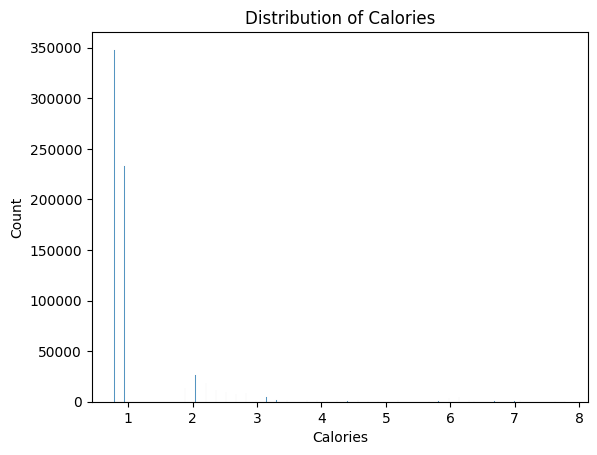

In [ ]:
sns.histplot(minutelyActivity_merged['Calories'])
plt.xlabel('Calories')
plt.ylabel('Count')
plt.title('Distribution of Calories')

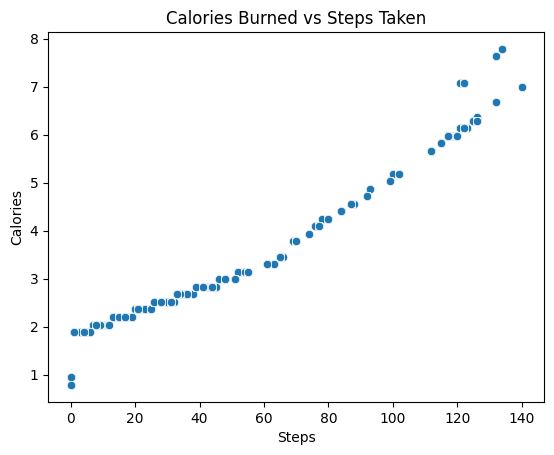

In [ ]:
# Scatter plot of Calories vs Steps

sns.scatterplot(x='Steps_x', y='Calories', data=minutelyActivity_merged)
plt.title('Calories Burned vs Steps Taken')
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.show()

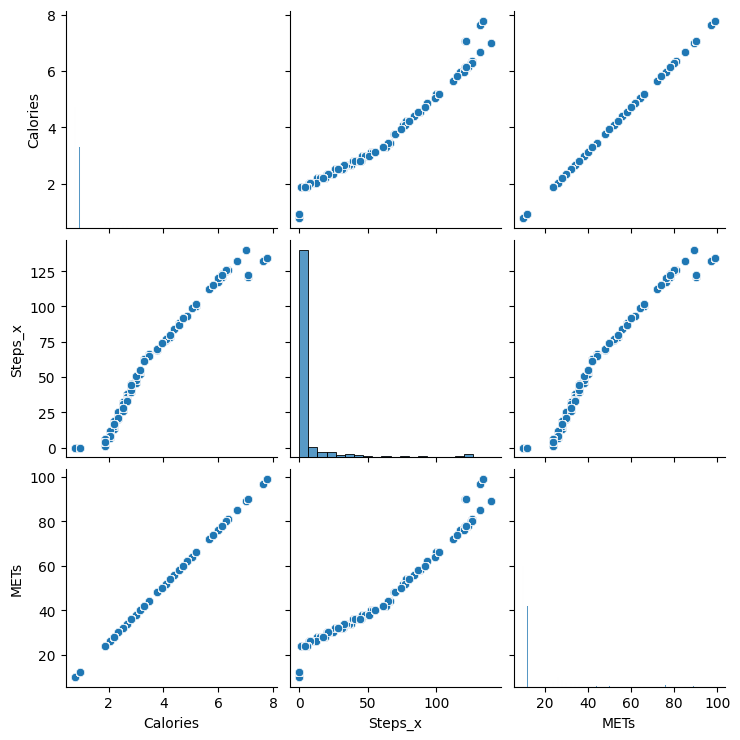

<Figure size 640x480 with 0 Axes>

In [ ]:
# Pairplot for selected columns

sns.pairplot(minutelyActivity_merged[['Calories', 'Steps_x', 'METs']])
plt.show()
plt.tight_layout()

Key Findings:

*   Using Fitbit data to track progress towards fitness goals, identify patterns or trends in their activity, and make adjustments better health outcomes.
*   Additionally, aggregated Fitbit data can be utilized for population-level studies to understand broader health trends and inform public health interventions.

In [ ]:
# Download the final cleaned data.
minutelyActivity_merged.to_csv('minutelyActivity_merged.csv',index=False)
from google.colab import files
files.download('minutelyActivity_merged.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>